## II. Data Visualizations and final wrangling
The aim of this notebook is to show some visualization of the existing data set.

The information is presented as follows:

* General Data Exploration: Existing relationships between dataset
* Label Exploration
* Exploring relationships between label and numerical features
* Exploring relationships between label and categorical features
* Using Aesthetics to explore relationships between label and numerical/categorical features
* Final data wrangling: 
    - Drop columns
    - Scale Data
    - Handle outliers
    - Data is finally saved for training the model

In [1]:
# import libraries
import pandas as pd
from sklearn import preprocessing
import sklearn.model_selection as ms
from sklearn import linear_model
import sklearn.metrics as sklm
import numpy as np
import numpy.random as nr
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as ss
import math

%matplotlib inline
%matplotlib inline

In [2]:
#import data set modiied data set from file Data Preparation(train)
df=pd.read_csv('dfprepared.csv')
df.shape

(1401, 40)

### 1.  General Data Exploration

In [3]:
df.describe()

,row_id,agricultural_land_area,percentage_of_arable_land_equipped_for_irrigation,cereal_yield,forest_area,total_land_area,fertility_rate,life_expectancy,rural_population,total_population,...,access_to_electricity,co2_emissions,unemployment_rate,total_labor_force,military_expenditure_share_gdp,proportion_of_seats_held_by_women_in_gov,political_stability,year2,urban_share,rural_share
count,1401.000000,1.385000e+03,1153.000000,1337.000000,1.385000e+03,1.401000e+03,1387.000000,1386.000000,1.401000e+03,1.401000e+03,...,1397.000000,1.317000e+03,1337.000000,1.337000e+03,1128.000000,1258.000000,1266.000000,1401.000000,1401.000000,1401.000000
mean,700.000000,3.539588e+05,27.891446,2753.178229,2.329455e+05,8.181146e+05,3.251874,67.114055,2.658025e+07,4.499105e+07,...,73.795389,8.304671e+04,8.580335,1.871233e+07,1.919332,15.618462,-0.376020,2003.647395,0.498490,0.501383
std,404.578175,1.172377e+06,28.577625,2777.815145,9.266334e+05,2.792117e+06,1.471044,8.786850,1.052394e+08,1.546745e+08,...,31.280311,2.248360e+05,6.645133,6.112347e+07,1.480842,10.324280,0.858888,4.815289,0.214448,0.215131
min,0.000000,2.944179e+00,0.000000,179.258873,9.806688e+00,2.018306e+01,0.836053,38.204140,0.000000e+00,6.172455e+04,...,0.010012,1.008288e+02,0.491115,3.490659e+04,0.000000,0.000000,-2.781258,2000.000000,0.082009,0.000000
25%,350.000000,1.174577e+04,3.490956,1424.503830,4.159005e+03,2.507460e+04,2.175432,61.677998,8.349747e+05,1.516541e+06,...,51.062336,1.265778e+03,3.748595,9.076810e+05,1.033886,8.575444,-0.948167,2000.000000,0.324898,0.344271
50%,700.000000,4.701980e+04,18.846225,2221.920986,2.224170e+04,1.309442e+05,2.751553,69.857724,3.373348e+06,7.378974e+06,...,89.156218,7.637910e+03,6.633461,3.411048e+06,1.538130,13.093035,-0.287659,2000.000000,0.486299,0.515260
75%,1050.000000,2.247874e+05,41.954776,3296.467202,1.255963e+05,6.261072e+05,4.227445,73.706476,1.191299e+07,2.614718e+07,...,98.708971,4.689573e+04,11.454023,1.117916e+07,2.325482,21.614527,0.200449,2010.000000,0.656339,0.676663
max,1400.000000,1.045780e+07,101.906349,27978.265095,8.243222e+06,2.403061e+07,7.544631,84.771403,8.947322e+08,1.313304e+09,...,101.996650,2.265183e+06,37.977184,4.985771e+08,13.326110,64.773806,1.376322,2010.000000,1.034921,0.935618


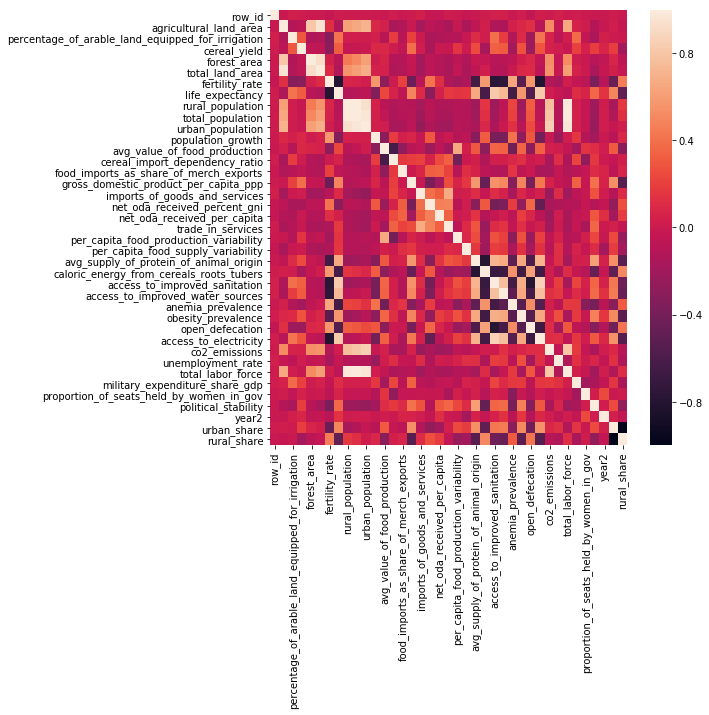

In [4]:
# Let's observe the existing correlations between dataset
plt.figure(figsize=(8,8)) 

sns.heatmap(df.corr())

I shall see better the correlations by creating a list, while in chart above we can see some interesting things, as it shows existing correlations between all variables in the dataset (numerical)

In [5]:
# Table below will allow us to see more data in detail if required
df.corr()

,row_id,agricultural_land_area,percentage_of_arable_land_equipped_for_irrigation,cereal_yield,forest_area,total_land_area,fertility_rate,life_expectancy,rural_population,total_population,...,access_to_electricity,co2_emissions,unemployment_rate,total_labor_force,military_expenditure_share_gdp,proportion_of_seats_held_by_women_in_gov,political_stability,year2,urban_share,rural_share
row_id,1.000000,-0.012665,0.038056,0.013669,0.000519,-0.004847,-0.034164,0.013241,0.002592,0.002807,...,0.027783,0.001615,0.046467,0.002417,0.016802,-0.001896,-0.009710,-0.012899,0.012508,-0.013080
agricultural_land_area,-0.012665,1.000000,-0.119532,-0.066400,0.807158,0.954624,0.122362,-0.138010,0.615256,0.652992,...,-0.089470,0.519408,-0.034006,0.652084,0.054589,0.014086,-0.113420,-0.017822,0.024648,-0.024149
percentage_of_arable_land_equipped_for_irrigation,0.038056,-0.119532,1.000000,0.295433,-0.131208,-0.118240,-0.322452,0.411749,0.031571,0.026574,...,0.415277,0.063178,-0.074895,0.027156,0.381100,-0.046984,-0.160201,0.037797,0.008120,-0.007586
cereal_yield,0.013669,-0.066400,0.295433,1.000000,-0.049100,-0.060975,-0.304741,0.319883,-0.026914,-0.021191,...,0.286865,0.052099,0.022843,-0.020550,0.196449,0.052608,0.196058,0.073165,0.191270,-0.189217
forest_area,0.000519,0.807158,-0.131208,-0.049100,1.000000,0.928500,0.040469,-0.092332,0.442554,0.504904,...,-0.047651,0.536683,-0.033485,0.520756,0.013097,-0.012816,-0.092288,-0.050009,0.076432,-0.075461
total_land_area,-0.004847,0.954624,-0.118240,-0.060975,0.928500,1.000000,0.097152,-0.124545,0.556629,0.605135,...,-0.074260,0.558129,-0.021208,0.609811,0.053017,-0.006494,-0.164710,-0.029477,0.033516,-0.032747
fertility_rate,-0.034164,0.122362,-0.322452,-0.304741,0.040469,0.097152,1.000000,-0.799048,0.073625,0.056686,...,-0.814667,-0.120325,-0.167127,0.029608,-0.038366,-0.065649,-0.378579,-0.084862,-0.459008,0.459892
life_expectancy,0.013241,-0.138010,0.411749,0.319883,-0.092332,-0.124545,-0.799048,1.000000,-0.111348,-0.096366,...,0.827314,0.021680,-0.029072,-0.074187,0.112693,0.065117,0.366967,0.147330,0.496897,-0.496842
rural_population,0.002592,0.615256,0.031571,-0.026914,0.442554,0.556629,0.073625,-0.111348,1.000000,0.993388,...,-0.097350,0.761194,-0.115662,0.989707,0.042477,-0.036557,-0.204289,0.013799,-0.165707,0.165853
total_population,0.002807,0.652992,0.026574,-0.021191,0.504904,0.605135,0.056686,-0.096366,0.993388,1.000000,...,-0.072247,0.801687,-0.113397,0.997911,0.043976,-0.033247,-0.220543,0.017480,-0.121365,0.120972


In [6]:
# Here is a list of the top most important correlations

import pandas as pd
d = df.loc[:, df.columns != 'country_code']

def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

print("Top Absolute Correlations")
print(get_top_abs_correlations(d, 15))

Top Absolute Correlations
total_population               total_labor_force                0.997911
urban_share                    rural_share                      0.997641
rural_population               total_population                 0.993388
                               total_labor_force                0.989707
urban_population               total_labor_force                0.974371
total_population               urban_population                 0.972803
agricultural_land_area         total_land_area                  0.954624
rural_population               urban_population                 0.940436
forest_area                    total_land_area                  0.928500
access_to_improved_sanitation  access_to_electricity            0.863503
urban_population               co2_emissions                    0.850898
life_expectancy                access_to_electricity            0.827314
fertility_rate                 access_to_electricity            0.814667
life_expectancy          

Note there could be some collinearity issues given high correlation between variables. I shall deal this issue on the following jupyter notebook 

### 2. Exploring the label (Prevalence of Undernourishment)

The first thing I need to do, is to import the label and merge it to the train dataset


In [7]:
#import second data set (CPtrain label)
labels=pd.read_csv('CPtrain_labels.csv', sep=',')
labels.shape

(1401, 2)

In [8]:
#Merge the 2 tables
df= pd.concat([df,labels],axis=1)
df.shape

(1401, 42)

In [9]:
# See the number of duplicate columns (probably id column)
df.head()

,row_id,country_code,agricultural_land_area,percentage_of_arable_land_equipped_for_irrigation,cereal_yield,forest_area,total_land_area,fertility_rate,life_expectancy,rural_population,...,unemployment_rate,total_labor_force,military_expenditure_share_gdp,proportion_of_seats_held_by_women_in_gov,political_stability,year2,urban_share,rural_share,row_id,prevalence_of_undernourishment
0,0,889f053,235077.658128,38.558520,935.754365,5397.737544,537408.312513,5.928981,60.452227,1.354087e+07,...,14.788020,4.350521e+06,7.021072,0.698153,-1.393801,2000,0.269132,0.716467,0,31.260713
1,1,9e614ab,23000.640738,21.282631,4031.452161,178336.529912,232013.631676,3.000629,64.655419,4.070197e+06,...,0.687018,3.262614e+06,0.198831,25.101826,0.030556,2010,0.351608,0.631281,1,18.298233
2,2,100c476,90.954867,4.317080,1581.935278,101.780566,445.037137,2.301860,74.347806,5.689435e+04,...,NaN,NaN,NaN,5.395413,0.651586,2000,0.319509,0.679114,2,39.513397
3,3,4609682,100843.661212,16.636618,1127.626364,10348.866929,154616.148188,2.199311,74.698405,3.743950e+06,...,15.948356,3.979141e+06,1.626305,26.735951,-0.928788,2010,0.650169,0.334231,3,4.444016
4,4,be2a7f5,224.289357,NaN,1418.987212,460.113424,740.295659,NaN,NaN,2.289438e+04,...,NaN,NaN,NaN,19.136813,0.956027,2000,0.669631,0.323787,4,4.940301


In [10]:
#Remove duplicate columns. I remove the only duplicate I have (row_id), otherwise I cannot do plots
>>> _, i = np.unique(df.columns, return_index=True)
df=df.iloc[:, i] 
# I check on the shape, and I can see I have now 48 and not 49 columns
df.shape

(1401, 41)

### 2.1 Explore the label (Prevalence of Undernoursihment)


In [11]:
## Descriptive statistics for label
df.prevalence_of_undernourishment.describe()

count    1401.000000
mean       15.510697
std        11.610440
min         2.493428
25%         5.710856
50%        12.118656
75%        22.447492
max        59.089781
Name: prevalence_of_undernourishment, dtype: float64

(array([271., 199., 147., 116.,  96., 105.,  62.,  68.,  67.,  63.,  44.,
         36.,  23.,  25.,  26.,  18.,  11.,   4.,   7.,   2.,   6.,   5.]),
 array([ 2.49342835,  5.06598983,  7.63855132, 10.2111128 , 12.78367428,
        15.35623576, 17.92879725, 20.50135873, 23.07392021, 25.64648169,
        28.21904318, 30.79160466, 33.36416614, 35.93672762, 38.50928911,
        41.08185059, 43.65441207, 46.22697355, 48.79953504, 51.37209652,
        53.944658  , 56.51721948, 59.08978097]),
 <a list of 22 Patch objects>)

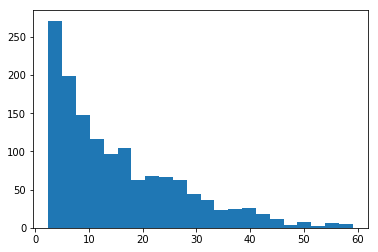

In [12]:
plt.hist(df.prevalence_of_undernourishment,22)


### 2.2 Explore relationships between numerical variables and the label

List of numerical columns selected has been obtained from most relevant variables to predict the label detected on the chosen algorithm (see following jupyter notebooks)


C:\Users\Florence\Anaconda333\envs\xebiamow\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)
C:\Users\Florence\Anaconda333\envs\xebiamow\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\Florence\Anaconda333\envs\xebiamow\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\Florence\Anaconda333\envs\xebiamow\lib\site-packages\numpy\core\_methods.py:32: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial)
C:\Users\Florence\Anaconda333\envs\xebiamow\lib\site-packages\numpy\core\_methods.py:28: RuntimeWarning: invalid value encoun

C:\Users\Florence\Anaconda333\envs\xebiamow\lib\site-packages\matplotlib\contour.py:1557: UserWarning: Warning: converting a masked element to nan.
  self.zmax = float(z.max())
C:\Users\Florence\Anaconda333\envs\xebiamow\lib\site-packages\matplotlib\contour.py:1558: UserWarning: Warning: converting a masked element to nan.
  self.zmin = float(z.min())
C:\Users\Florence\Anaconda333\envs\xebiamow\lib\site-packages\matplotlib\contour.py:1243: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"
C:\Users\Florence\Anaconda333\envs\xebiamow\lib\site-packages\matplotlib\contour.py:1557: UserWarning: Warning: converting a masked element to nan.
  self.zmax = float(z.max())
C:\Users\Florence\Anaconda333\envs\xebiamow\lib\site-packages\matplotlib\contour.py:1558: UserWarning: Warning: converting a masked element to nan.
  self.zmin = float(z.min())
C:\Users\Florence\Anaconda333\envs\xebiamow\lib\site-packages\matplotlib\contour.py:1243: 

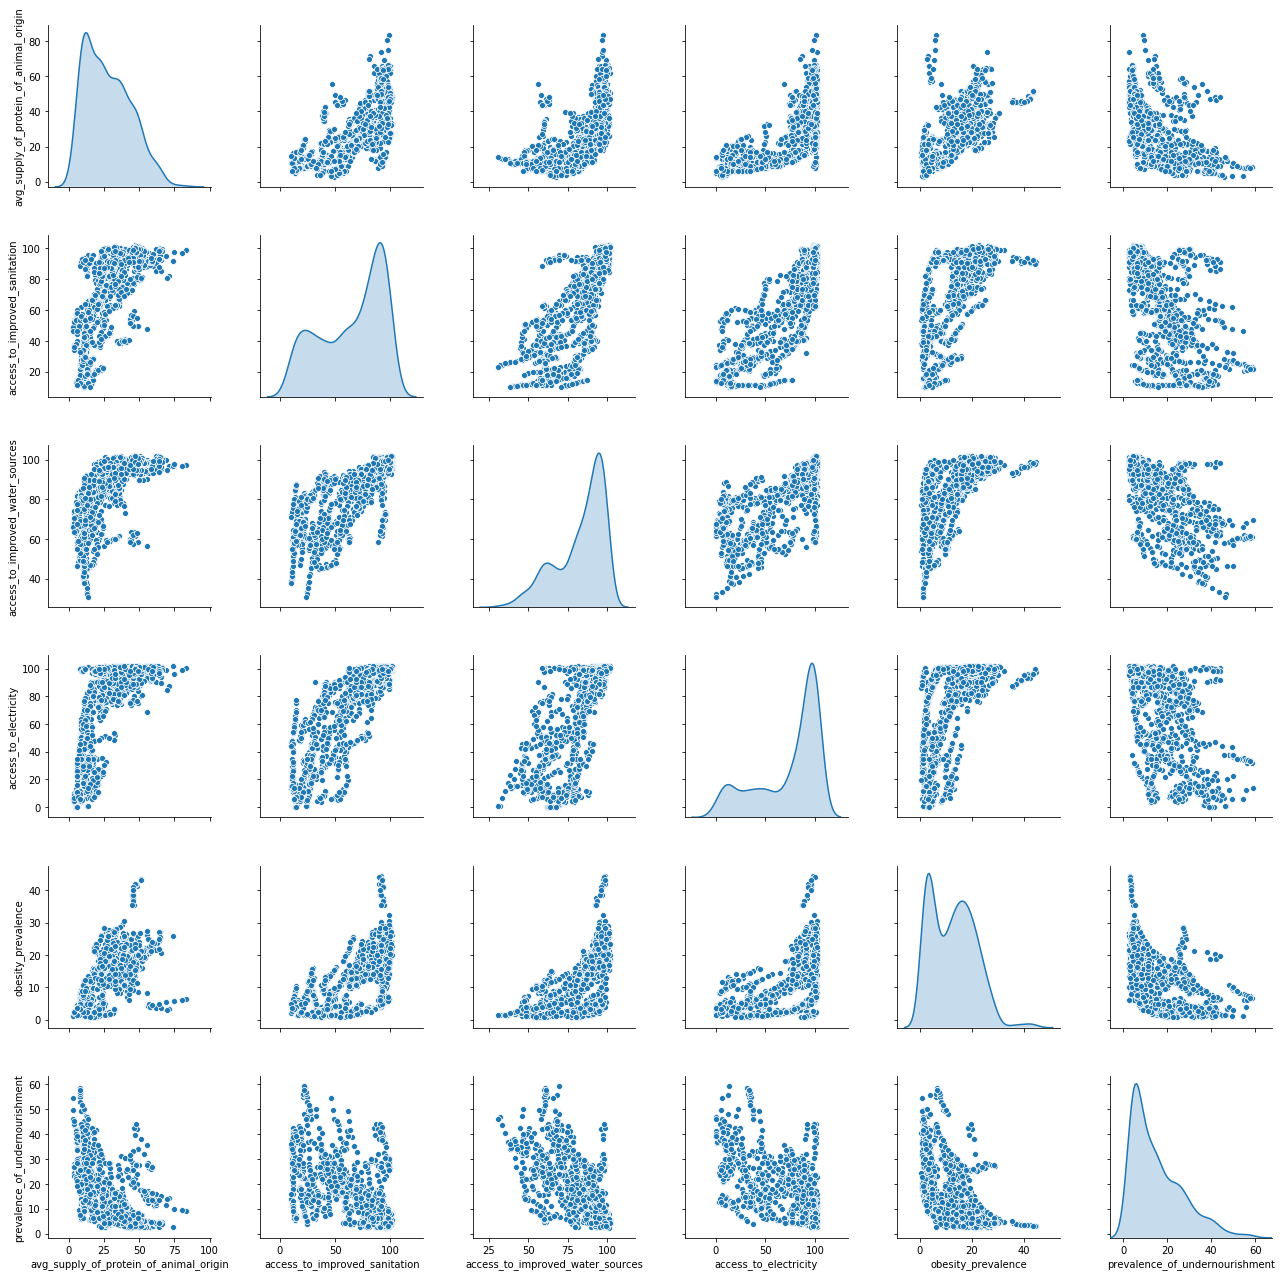

In [13]:
# Let's observe the existing correlations between dataset
## Create scatter-plot matrix of most important correlations with the label

num_cols1 = ["avg_supply_of_protein_of_animal_origin", "access_to_improved_sanitation",
            "access_to_improved_water_sources", "access_to_electricity","obesity_prevalence","prevalence_of_undernourishment"] 
sns.pairplot(df[num_cols1], diag_kind="kde", size=3).map_upper(sns.kdeplot, cmap="summer")


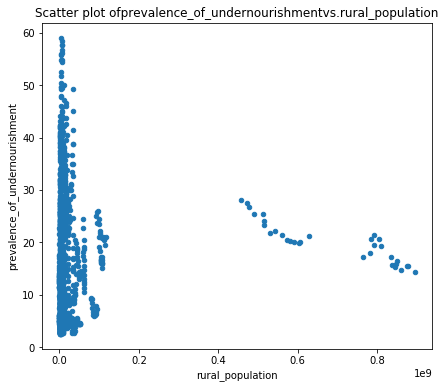

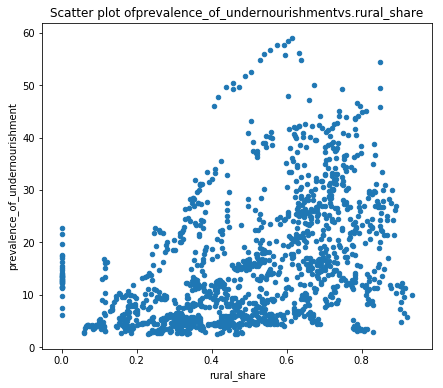

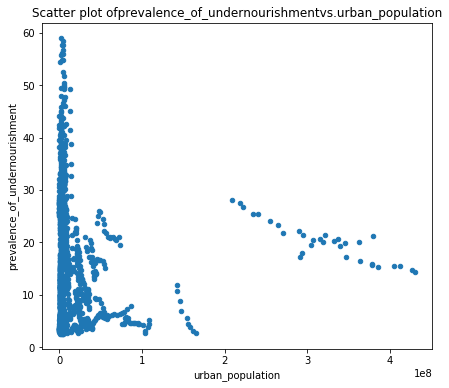

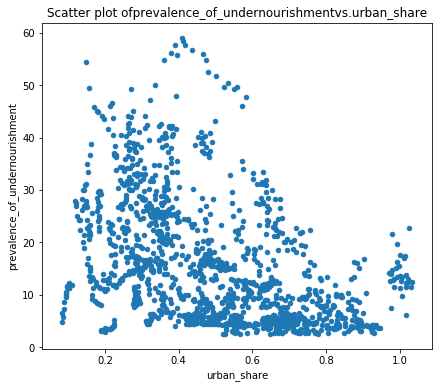

In [14]:
## View relationship with the label of the newly created features (vs existing ones)
def plot_scatter(df,cols,col_y='prevalence_of_undernourishment'):
    for col in cols:
        fig = plt. figure(figsize=(7,6))
        ax = fig.gca()
        df.plot.scatter(x=col,y=col_y, ax = ax)
        ax.set_title('Scatter plot of' + col_y + 'vs.'+col)
        ax.set_xlabel(col)
        ax.set_ylabel(col_y)
        plt.show()

num_cols=['rural_population','rural_share','urban_population','urban_share']
plot_scatter(df,num_cols)

Clearly, newly created variables (urban_share and rural_share) seem to have a stronger correlationship with the label than rural_popularion or urban_population

### 2.2 Exploring relationships between label and categorical features


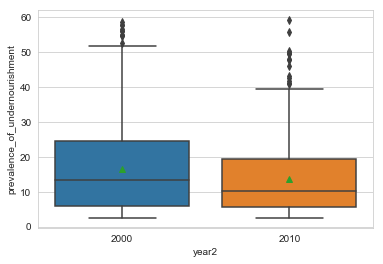

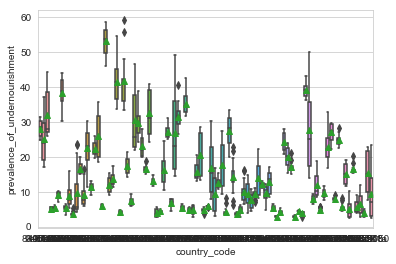

In [15]:
## 2000 vs 2010 prevalence of undernourishment
def plot_box(df, cols, col_y='prevalence_of_undernourishment'):
    for col in cols:
        sns.set_style("whitegrid")
        sns.boxplot(col, col_y, data=df,showmeans=True)
        plt.xlabel(col)
        plt.ylabel(col_y)
        plt.show()
        
cat_cols = ['year2','country_code']
plot_box(df, cat_cols)  

Boxplot above showing relationship between year and PoU can be misleading, as there is more data from the 2000s decades than the 2010s decades. 

### 3. Using Aesthetics for visualization purposes

Chart below will study the evolution of the most relevant variables to predict the label (Prevalence of Undernourishment) on the 200 vs 2010 decade

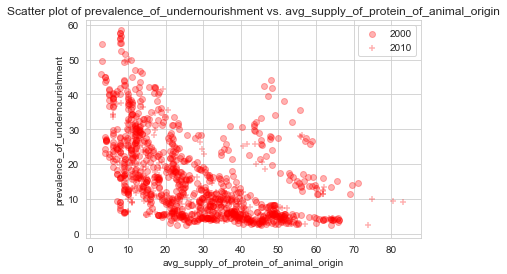

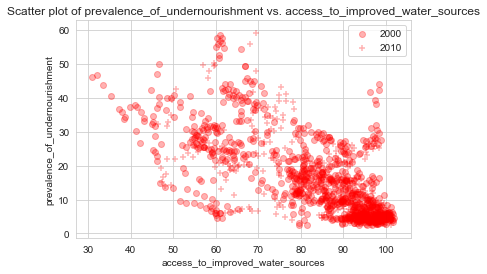

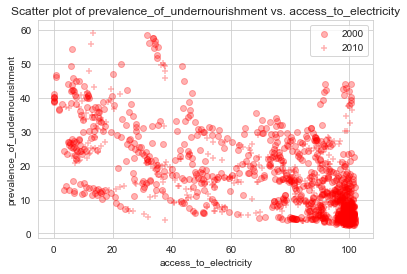

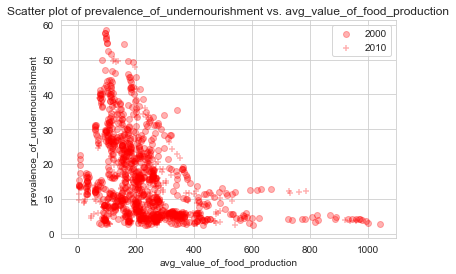

In [16]:
def plot_scatter_shape(df, cols, shape_col = 'year2', col_y = 'prevalence_of_undernourishment', alpha = 0.3):
    shapes = ['o', '+', 's', 'x', '^'] # pick distinctive shapes
    unique_cats = df[shape_col].unique()
    for col in cols: # loop over the columns to plot
        sns.set_style("whitegrid")
        for i, cat in enumerate(unique_cats): # loop over the unique categories
            temp = df[df[shape_col] == cat]
            sns.regplot(col, col_y, data=temp, marker = shapes[i], label = cat,
                        scatter_kws={"alpha":alpha}, fit_reg = False, color = 'red')
        plt.title('Scatter plot of ' + col_y + ' vs. ' + col) # Give the plot a main title
        plt.xlabel(col) # Set text for the x axis
        plt.ylabel(col_y)# Set text for y axis
        plt.legend()
        plt.show()
            
num_cols = ['avg_supply_of_protein_of_animal_origin','access_to_improved_water_sources','access_to_electricity','avg_value_of_food_production']
plot_scatter_shape(df, num_cols)    

### 4. Final data preparation


#### 4.1 Drop irrelevant rows 
I shall delete rows that have proved weak predictive power (and because new one have been created), as well as row_id

In [17]:
#Drop Columns with too many missing values (nan)
df= df.drop(['row_id'], axis = 1)

#### 4.2 Fill in blanks with mode


In [18]:
## to handle the problem of too many missing values for the columns I have, I have replaced the missing values with the mode
for column in df:
    df[column].fillna(df[column].mode()[0], inplace=True)

#### 4.3 Convert non-numerical columns to categorical and one hot encoding

In [19]:
# Get dummy varibles for Warranty
df = pd.concat([df,pd.get_dummies(df['year2'], prefix='Deacade:')],axis=1)

In [20]:
df= df.drop(['year2'], axis = 1)

In [21]:
df= df.drop(['rural_population','urban_population'], axis = 1)

In [22]:
# Trun into categorical (but not create dummies for country)
df["country_code"] = df["country_code"].astype('category')

In [23]:
df.dtypes

access_to_electricity                                 float64
access_to_improved_sanitation                         float64
access_to_improved_water_sources                      float64
agricultural_land_area                                float64
anemia_prevalence                                     float64
avg_supply_of_protein_of_animal_origin                float64
avg_value_of_food_production                          float64
caloric_energy_from_cereals_roots_tubers              float64
cereal_import_dependency_ratio                        float64
cereal_yield                                          float64
co2_emissions                                         float64
country_code                                         category
fertility_rate                                        float64
food_imports_as_share_of_merch_exports                float64
forest_area                                           float64
gross_domestic_product_per_capita_ppp                 float64
imports_

Note that I keep one non-numerical column, the country_code. The reason being is that I have several countries repeated on the dataset. Instead of deleting duplicates, I shall use them to learn from their patterns. When doing the test/train split, I shall make sure that countries with duplicate entries are not split between training and test sets, they should be on the same set. 

In [24]:
#Move LABEL column (attractiveness) to the end of the dataset
cols = [col for col in df if col != 'prevalence_of_undernourishment']+['prevalence_of_undernourishment']
df = df[cols]
df.head()

,access_to_electricity,access_to_improved_sanitation,access_to_improved_water_sources,agricultural_land_area,anemia_prevalence,avg_supply_of_protein_of_animal_origin,avg_value_of_food_production,caloric_energy_from_cereals_roots_tubers,cereal_import_dependency_ratio,cereal_yield,...,rural_share,total_labor_force,total_land_area,total_population,trade_in_services,unemployment_rate,urban_share,Deacade:_2000,Deacade:_2010,prevalence_of_undernourishment
0,52.433239,43.286502,57.932801,235077.658128,59.061443,11.024062,60.891336,64.129571,78.452754,935.754365,...,0.716467,4.350521e+06,537408.312513,1.889951e+07,2.308559,14.788020,0.269132,1,0,31.260713
1,77.715574,63.513220,71.120737,23000.640738,36.901084,14.046164,266.065999,68.285707,-5.250878,4031.452161,...,0.631281,3.262614e+06,232013.631676,6.447523e+06,8.929963,0.687018,0.351608,0,1,18.298233
2,91.150981,85.820712,97.587324,90.954867,27.242818,47.203308,111.633560,28.110750,88.049596,1581.935278,...,0.679114,3.490659e+04,445.037137,8.377729e+04,69.947271,0.491115,0.319509,1,0,39.513397
3,99.030403,92.274315,95.611515,100843.661212,29.076919,2.957107,334.252960,22.589928,-228.300258,1127.626364,...,0.334231,3.979141e+06,154616.148188,1.120167e+07,17.270456,15.948356,0.650169,0,1,4.444016
4,91.930367,10.337271,30.784598,224.289357,25.008846,51.586010,365.214142,34.326635,101.256835,1418.987212,...,0.323787,3.490659e+04,740.295659,7.070804e+04,40.227419,0.491115,0.669631,1,0,4.940301


**4.4 Normalize data for algorithm testing**

In [25]:
df.columns

Index(['access_to_electricity', 'access_to_improved_sanitation',
       'access_to_improved_water_sources', 'agricultural_land_area',
       'anemia_prevalence', 'avg_supply_of_protein_of_animal_origin',
       'avg_value_of_food_production',
       'caloric_energy_from_cereals_roots_tubers',
       'cereal_import_dependency_ratio', 'cereal_yield', 'co2_emissions',
       'country_code', 'fertility_rate',
       'food_imports_as_share_of_merch_exports', 'forest_area',
       'gross_domestic_product_per_capita_ppp',
       'imports_of_goods_and_services', 'life_expectancy',
       'military_expenditure_share_gdp', 'net_oda_received_per_capita',
       'net_oda_received_percent_gni', 'obesity_prevalence', 'open_defecation',
       'per_capita_food_production_variability',
       'per_capita_food_supply_variability',
       'percentage_of_arable_land_equipped_for_irrigation',
       'political_stability', 'population_growth',
       'proportion_of_seats_held_by_women_in_gov', 'rural_share

In [26]:
quant_features = ['access_to_electricity', 'access_to_improved_sanitation',
       'access_to_improved_water_sources', 'agricultural_land_area',
       'anemia_prevalence', 'avg_supply_of_protein_of_animal_origin',
       'avg_value_of_food_production',
       'caloric_energy_from_cereals_roots_tubers',
       'cereal_import_dependency_ratio', 'cereal_yield', 'co2_emissions','fertility_rate',
       'food_imports_as_share_of_merch_exports', 'forest_area',
       'gross_domestic_product_per_capita_ppp',
       'imports_of_goods_and_services', 'life_expectancy',
       'military_expenditure_share_gdp', 'net_oda_received_per_capita',
       'net_oda_received_percent_gni', 'obesity_prevalence', 'open_defecation',
       'per_capita_food_production_variability',
       'per_capita_food_supply_variability',
       'percentage_of_arable_land_equipped_for_irrigation',
       'political_stability', 'population_growth',
       'proportion_of_seats_held_by_women_in_gov', 'rural_share',
       'total_labor_force', 'total_land_area', 'total_population',
       'trade_in_services', 'unemployment_rate', 'urban_share',]
# Store scalings in a dictionary so we can convert back later
scaled_features = {}
for each in quant_features:
    mean, std = df[each].mean(), df[each].std()
    scaled_features[each] = [mean, std]
    df.loc[:, each] = (df[each] - mean)/std

**4.5 Remove outliers**

In [27]:
# Handle outliers on numeric features
import scipy as sp
from scipy import stats
df = df[(np.abs(sp.stats.zscore(df[quant_features])) < 2.5).all(axis=1)]

In [28]:
df.head(10)

,access_to_electricity,access_to_improved_sanitation,access_to_improved_water_sources,agricultural_land_area,anemia_prevalence,avg_supply_of_protein_of_animal_origin,avg_value_of_food_production,caloric_energy_from_cereals_roots_tubers,cereal_import_dependency_ratio,cereal_yield,...,rural_share,total_labor_force,total_land_area,total_population,trade_in_services,unemployment_rate,urban_share,Deacade:_2000,Deacade:_2010,prevalence_of_undernourishment
1,0.131209,0.044677,-0.534437,-0.280310,0.419850,-0.542188,0.402156,1.350589,0.166395,0.504589,...,0.603808,-0.243936,-0.209913,-0.249191,-0.545020,-1.121657,-0.684934,0,1,18.298233
2,0.557962,0.782137,0.900896,-0.299954,-0.349091,1.366352,-0.576278,-1.062279,0.950054,-0.380889,...,0.826154,-0.297878,-0.292849,-0.290334,2.304820,-1.150862,-0.834617,1,0,39.513397
3,0.808238,0.995485,0.793744,-0.213564,-0.203069,-1.180479,0.834167,-1.393854,-1.707066,-0.545118,...,-0.776976,-0.231962,-0.237633,-0.218455,-0.155474,1.153525,0.707299,0,1,4.444016
5,0.512777,-0.684383,0.632802,-0.255474,2.230275,-1.180479,-1.258556,-1.393854,-1.707066,-0.380588,...,-1.703169,-0.288187,-0.201195,-0.278929,-0.854276,1.730391,1.731470,0,1,7.044938
8,-0.249659,-1.600405,0.173883,-0.165467,1.490610,-0.502769,0.418735,1.040527,0.429073,-0.306031,...,-0.084420,-0.106251,-0.212696,-0.129772,-0.323297,-0.429900,0.028819,0,1,5.436701
10,0.851414,0.934469,1.069134,-0.285654,-0.276228,-1.180479,-1.258556,-1.393854,-1.707066,0.166187,...,-0.616257,-0.274950,-0.282684,-0.272103,0.442527,1.541347,0.608765,0,1,4.434387
11,0.188404,0.422407,0.365019,-0.273020,-1.189309,0.029685,0.073590,-0.003055,0.649042,-0.333680,...,-0.007922,-0.245207,-0.252922,-0.239204,-0.038853,-0.739627,0.026279,1,0,15.275225
14,0.309712,0.033906,0.082660,-0.287225,-1.077006,-0.276710,-0.417894,0.324070,0.550900,-0.174314,...,-0.403178,-0.260881,-0.285614,-0.252683,-0.126262,-0.193982,0.357032,1,0,11.049226
15,0.227324,-0.588886,0.491553,0.006964,1.310824,-0.017135,-0.130708,0.159424,0.128638,-0.086917,...,0.762525,0.506288,-0.019763,0.664668,-0.574818,-0.136629,-0.663951,1,0,24.417895
17,0.867683,0.879705,0.863158,0.100613,-0.204511,-1.180479,-1.258556,-1.393854,-1.707066,-0.147890,...,-1.076586,0.141246,0.278691,0.218410,-0.854276,0.455483,1.117370,0,1,5.577997


### 5. Save data for algorithm training
Now data is ready to be prepared and run algorithms. So I save it accordingly.


In [29]:
df.to_csv("dfprepared2.csv", index=False)